In [1]:
import os
import matplotlib.pyplot as plt
import librosa
import IPython.display as ipd
import numpy as np

In [2]:
# Parameters for the signal
N = 4096  # Number of samples (higher for better frequency resolution)
sr = 8000.0  # Sampling rate (Hz), must be > 2 * max frequency (Nyquist theorem)
t = np.arange(N) / sr  # Time vector

# Generate the time-domain signal: y(t) = 0.3 * sin(2 * π * 1000 * t)
frequency = 1000.0  # Hz
signal = 0.3 * np.sin(2 * np.pi * frequency * t)

In [4]:
def plot_normalized_magnitude_spectrum(signal, sr, title, f_ratio=1):
    N = len(signal)

    # Compute FFT
    X = np.fft.fft(signal)

    # Magnitude, normalized by length
    X_mag = np.abs(X) / N

    # Single-sided spectrum (0 to Nyquist)
    if N % 2 == 0:
        n_unique = N // 2 + 1
        X_mag_single = X_mag[:n_unique]
        # Double amplitudes for non-DC, non-Nyquist components
        X_mag_single[1:n_unique-1] *= 2
    else:
        n_unique = (N + 1) // 2
        X_mag_single = X_mag[:n_unique]
        # Double all non-DC components (no Nyquist bin)
        X_mag_single[1:] *= 2

    # Frequency axis for positive side only
    f = np.linspace(0, sr / 2, n_unique)

    # Limit to requested frequency range
    f_bins = int(n_unique * f_ratio)

    plt.figure(figsize=(18, 5))
    plt.plot(f[:f_bins], X_mag_single[:f_bins])
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.title(title)
    plt.grid(True)
    plt.show()

Frequency domain

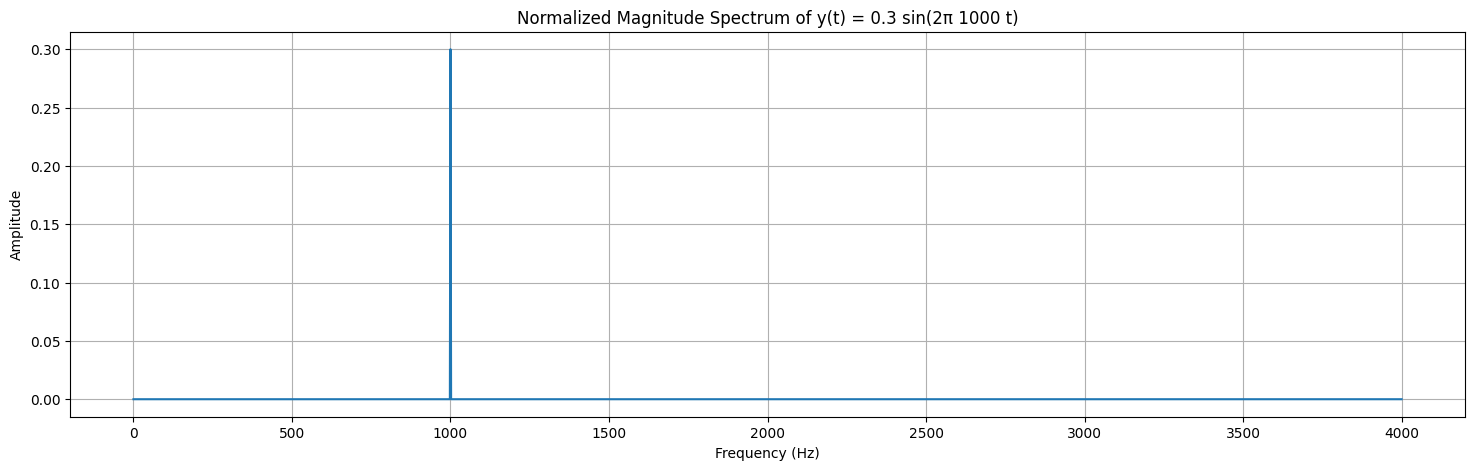

In [5]:
plot_normalized_magnitude_spectrum(signal, sr, "Normalized Magnitude Spectrum of y(t) = 0.3 sin(2π 1000 t)", f_ratio=1)

Time domain


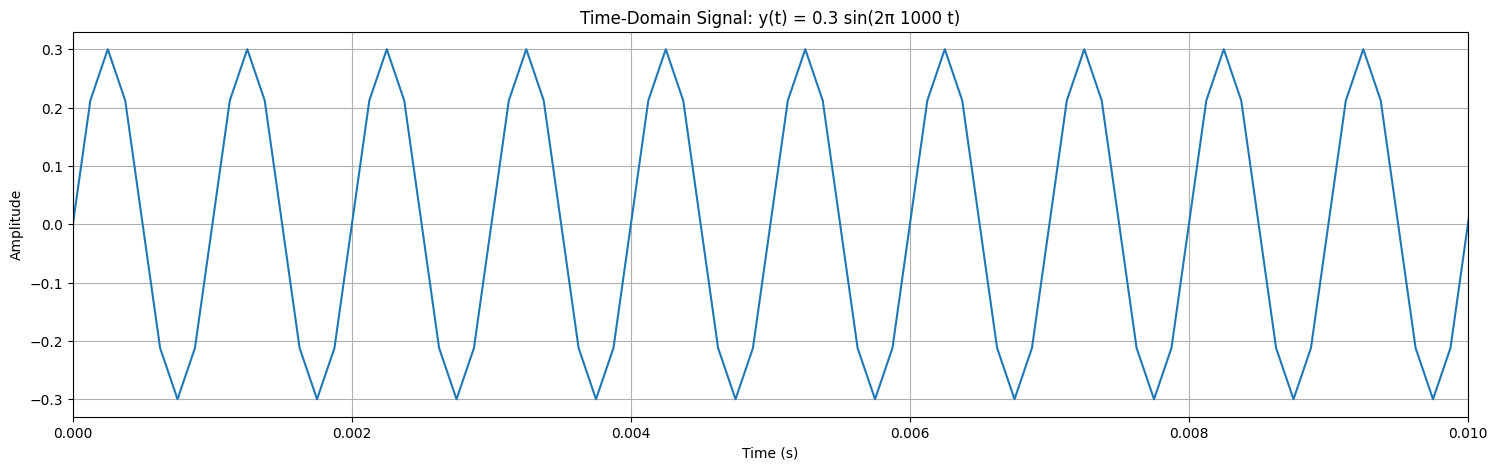

In [11]:
plt.figure(figsize=(18, 5))
plt.plot(t, signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time-Domain Signal: y(t) = 0.3 sin(2π 1000 t)')
plt.xlim(0, 0.01)
plt.grid(True)
plt.show()